In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Descargo el csv unido y limpio en el punto 1

df_visualizacion = pd.read_csv('df_union.csv', index_col=None)


In [3]:
df_visualizacion.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014


In [4]:
df_visualizacion.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014


# EJERCICIO
## Fase 2: Visualización

In [89]:
# Muestro las columnas del Data Frame visualizacion

df_visualizacion.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

### 1. ¿Como se distribuye la cantidad de vuelos reservados por mes durante el año?

In [11]:
df_visualizacion[['month','flights_booked','year']].sample(10)

,month,flights_booked,year
8689,1,8,2017
135926,9,0,2017
190637,12,0,2017
184448,11,3,2017
74902,5,0,2017
213563,4,7,2018
227972,2,0,2018
222101,4,7,2018
109449,7,0,2017
403138,12,0,2018


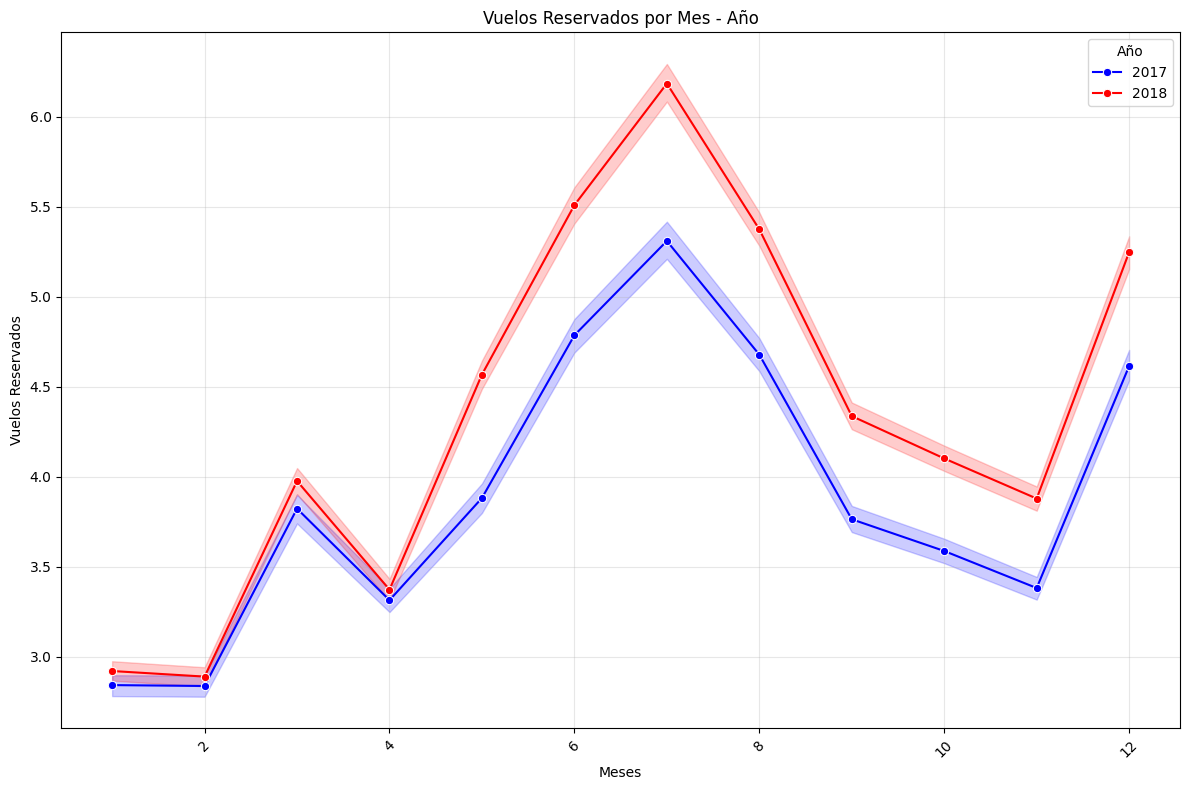

In [8]:
#El gráfico escogido es LINEPLOT, pertenece al grupo de tendencia. Es ideal para mostrar cambiso a lo largo del tiempo.

# Configuro el gráfico: tamaño, nombres de las variables y colores
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_visualizacion, x='month', y='flights_booked', hue='year', marker='o',
             palette=['blue', 'red'])  

# Configuro título, etiquetas y leyenda
plt.title('Vuelos Reservados por Mes - Año')
plt.xlabel('Meses')
plt.ylabel('Vuelos Reservados')
plt.legend(title='Año')
plt.grid(True, linestyle='-', alpha=0.3)  # Añadir cuadrícula con transparencia
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente el diseño para que todo encaje bien
plt.show()


### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [12]:
df_visualizacion[['distance','points_accumulated']].sample(10)

,distance,points_accumulated
209546,2910,291.0
228966,1284,160.0
67393,1164,116.0
170440,0,0.0
203138,2884,288.0
106180,3040,304.0
373951,2574,257.0
157636,0,0.0
234923,0,0.0
86375,890,89.0


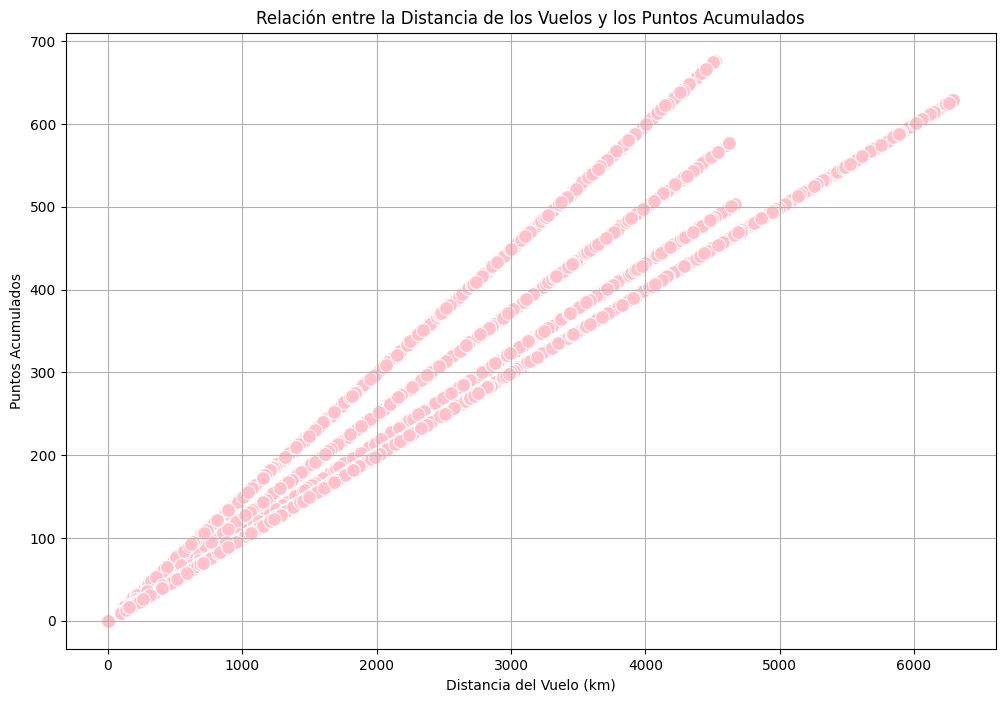

In [17]:

# El gráfico escogido es SCATTERPLOT O GRÁFICO DE DISPERSIÓN, pertenece al grupo de relación. 
# Es ideal para mostrar la relación entre dos variables numéricas.

# Configuro el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance', y='points_accumulated', data=df_visualizacion, color='pink', s=100, alpha=0.9)

# Ajustar el título y etiquetas
plt.title('Relación entre la Distancia de los Vuelos y los Puntos Acumulados')
plt.xlabel('Distancia del Vuelo (km)')
plt.ylabel('Puntos Acumulados')
plt.grid(True)
plt.show()

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [13]:
df_visualizacion[['province','loyalty_number']].sample(10)


,province,loyalty_number
140339,Quebec,415332
44269,Ontario,671173
27831,Ontario,690797
135915,Quebec,177457
116205,Ontario,922047
35402,Ontario,533365
379360,Ontario,597294
174882,Ontario,462459
287499,Ontario,188136
396959,Quebec,636012


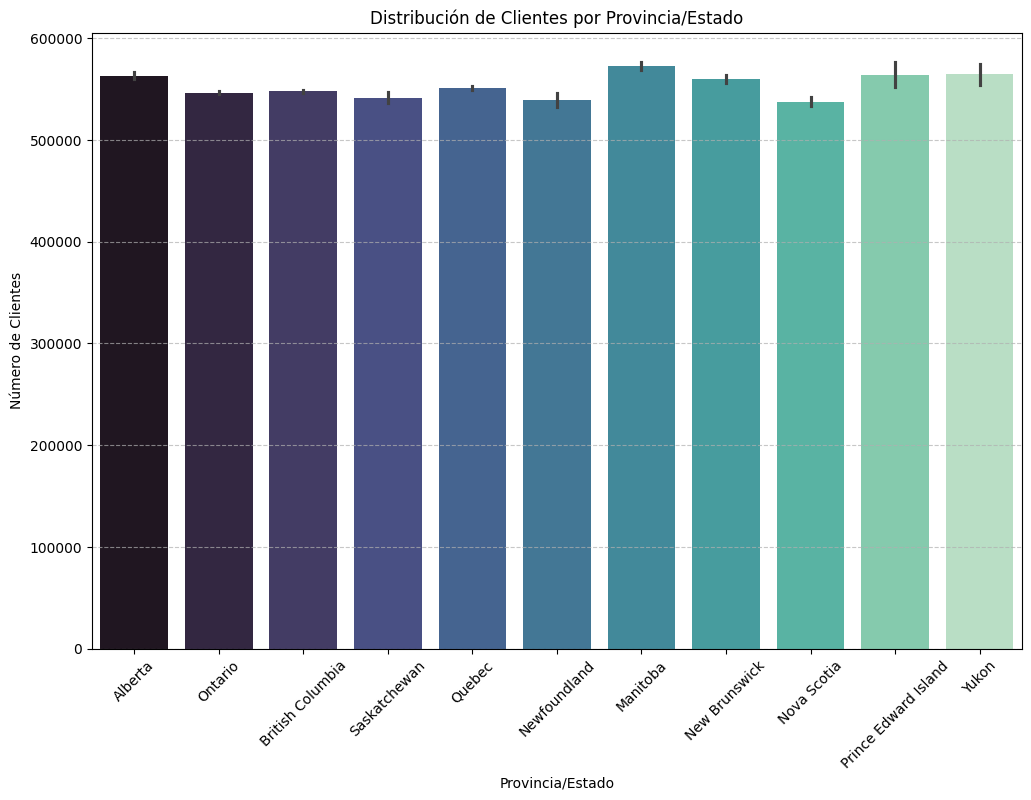

In [16]:
## GRAFICO DE BARRAS: El gráfico escogido es BARPLOT, pertenece al grupo de distribución. 
# Es ideal para mostrar la distribución de variables.

# Configurar el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='province', y='loyalty_number', data=df_visualizacion, palette='mako')

# Ajustar el título y etiquetas
plt.title('Distribución de Clientes por Provincia/Estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 4. ¿Como se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [14]:
df_visualizacion[['education','salary']].sample(10)

,education,salary
363510,Master,100817.0
347661,College,NaN
116767,Bachelor,75681.0
111940,Bachelor,82358.0
227258,Bachelor,84836.0
124323,College,NaN
269412,Bachelor,61008.0
215765,Bachelor,48956.0
278599,Doctor,179300.0
110963,College,NaN


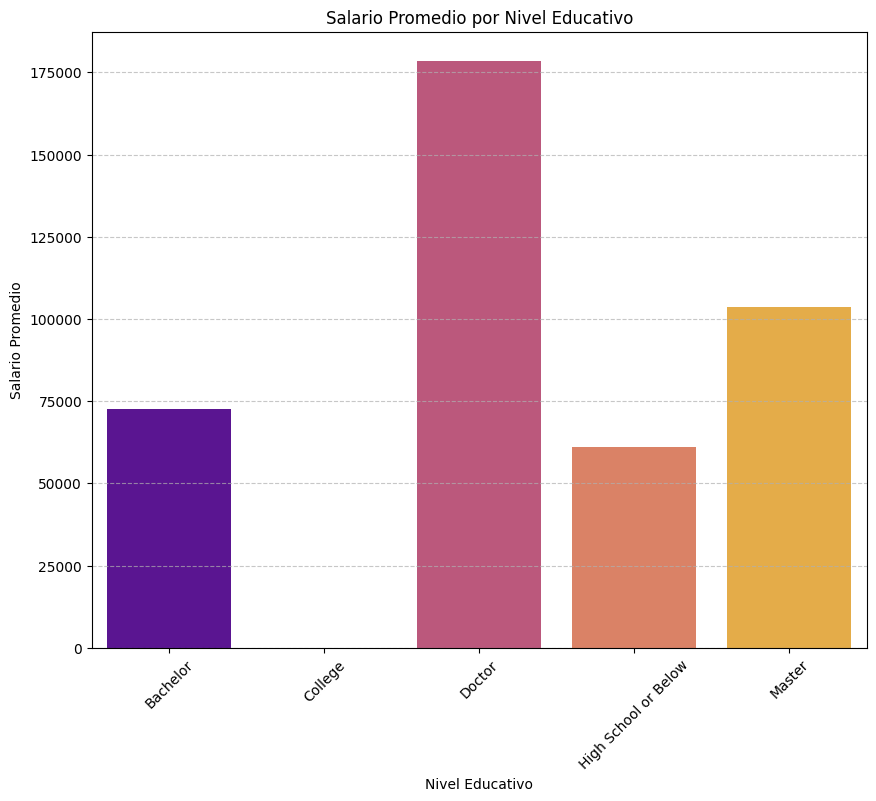

In [15]:
## GRAFICO DE BARRAS: El gráfico escogido es BARPLOT, pertenece al grupo de distribución. 
# Es ideal para mostrar la distribución de variables.

# Calcular el salario promedio por nivel educativo 
df_avg_salary = df_visualizacion.groupby('education')['salary'].mean().reset_index()

# Configurar el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='education', y='salary', data=df_avg_salary, palette='plasma')

# Ajustar el título y etiquetas
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [18]:
df_visualizacion[['loyalty_number','loyalty_card']].head()

,loyalty_number,loyalty_card
0,100018,Aurora
1,100102,Nova
2,100140,Nova
3,100214,Star
4,100272,Star


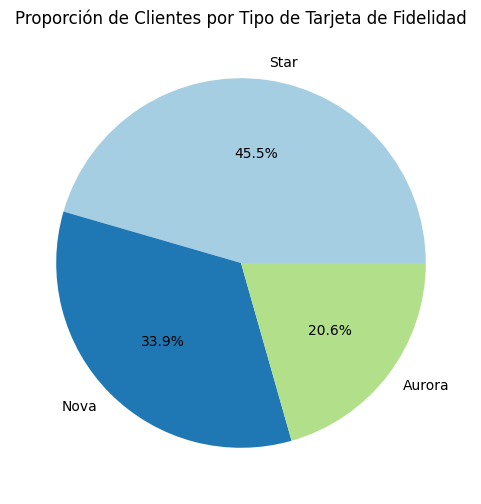

In [19]:
## GRAFICO CIRCULAR: El gráfico escogido es PIEPLOT, visualiza la proporción de cada categoría en una variable categórica

# Contar el número de clientes por tipo de tarjeta de fidelidad
df_loyalty_card = df_visualizacion['loyalty_card'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(df_loyalty_card, labels=df_loyalty_card.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(df_loyalty_card))))
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()


### 6. ¿Como se distribuyen los clientes según su estado civil y género?

In [20]:
df_visualizacion[['gender','marital_status']].sample(10)

,gender,marital_status
184990,Female,Married
161826,Male,Married
357765,Male,Married
116502,Female,Divorced
354815,Female,Married
35734,Male,Married
283202,Female,Single
350629,Female,Married
122406,Female,Married
245424,Male,Divorced


<Figure size 1000x600 with 0 Axes>

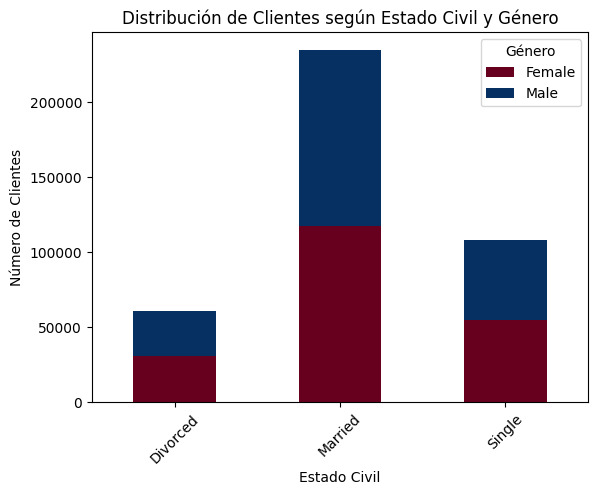

In [21]:


## GRAFICO DE BARRAS APILADAS: El gráfico escogido es STACKED BAR CHART

# Agrupo por estado civil y género y contar la cantidad de clientes
df_gender_marital_status = df_visualizacion.groupby(['marital_status', 'gender']).size().reset_index(name='loyalty_number')

# Creo una tabla para el gráfico apilado
df_pivot = df_gender_marital_status.pivot(index='marital_status', columns='gender', values='loyalty_number')

# Configuro el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, colormap='RdBu')
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()
